## Processamentos dos dados de Maré de Santos para Van Oord
- AtmosMarine (www.atmosmarine.com / atm@atmosmarine.com)
- Contato Van Oord: José Alexandre D. Mattos (JoseDamaceno.Mattos@vanoord.com)

A empresa Van Oord tem a necessidade de realizar um estudo do comportamento da onda de maré no estuário de Santos SP.

Para descrever o panorama geral da situação existem 5 estações oficiais homologadas pela marinha as quais temos as F-41 (em anexo) onde o nível de referencia é conhecido.

O estudo solicitado tem o proposito de subsidiar o atual zoneamento de maré no estuário bem como estabelecer uma nova estação maregráfica no Brasil Terminal Portuário BTP.

Então faz-se necessário conhecer a fase e amplitude das componentes de marés nas estações estabelecidas(Análise harmônica) .

Análise harmônica cruzada entre as estações BTP(Estação subordinada) e Capitania (estação controle).

A obtenção das constantes servirá de subsidio para a classificação de maré atuante no estuário e a escolha do melhor método  para o cálculo do nível de redução da estação.

Até o presente momento 5  marégrafos em operação, Praticagem, Capitania, Ilha Barnabé, Terminal BTP (Não homologada, ausência de F-41) e Cosipa(extremo a montante). Vide figura enviada por email:

A exata posição se encontra em anexo:

-Sobre a série temporal de Marés zipado em anexo:
- Marégrafo Orinoco sensor de pressão.

- Log a cada um minuto(Média da coleta de 30s)

- Arquivos txt separado por ;

- Hora em Fuso zulu

- Estações Praticagem, Capitania,Barnabé e Cosipa já reduzidas ao DHN.

- Estação BTP sensor no zero da régua de 5 metros.

In [96]:
import os
import glob
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt

/home/hp/Dropbox/maresantos/data/mare_barnabe_17052018_to_02072018.txt
                     mare_reduzida_metros
Data_Horazulu                            
2018-05-17 14:22:34                  0.42
2018-05-17 14:23:34                  0.42
2018-05-17 14:24:34                  0.43
2018-05-17 14:25:34                  0.43
2018-05-17 14:26:34                  0.43


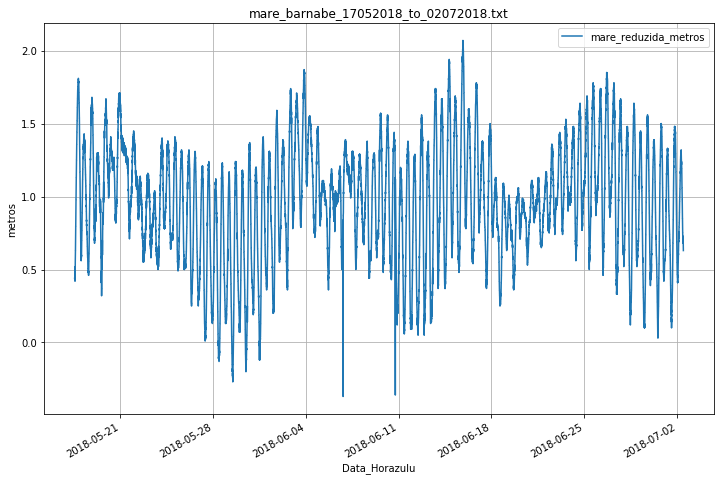

/home/hp/Dropbox/maresantos/data/mare_capitania_18052018_to_02072018.txt
                     mare_reduzida_metros
Data_Horazulu                            
2018-05-18 20:00:21                  1.57
2018-05-18 20:01:21                  1.59
2018-05-18 20:02:21                  1.57
2018-05-18 20:03:22                  1.50
2018-05-18 20:04:21                  1.47


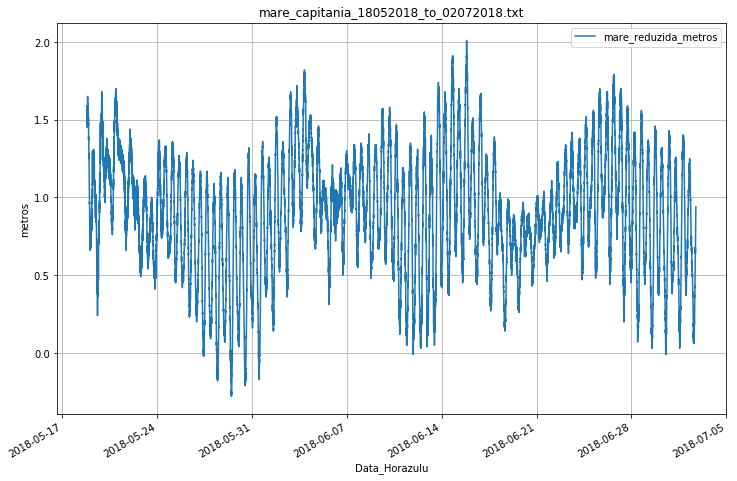

/home/hp/Dropbox/maresantos/data/mare_cosipa_18052018_to_02072018.txt
                     mare_reduzida_metros
Data_Horazulu                            
2018-05-18 13:33:38                  1.84
2018-05-18 13:34:38                  1.83
2018-05-18 13:35:38                  1.83
2018-05-18 13:36:50                  0.60
2018-05-18 13:37:50                  0.60


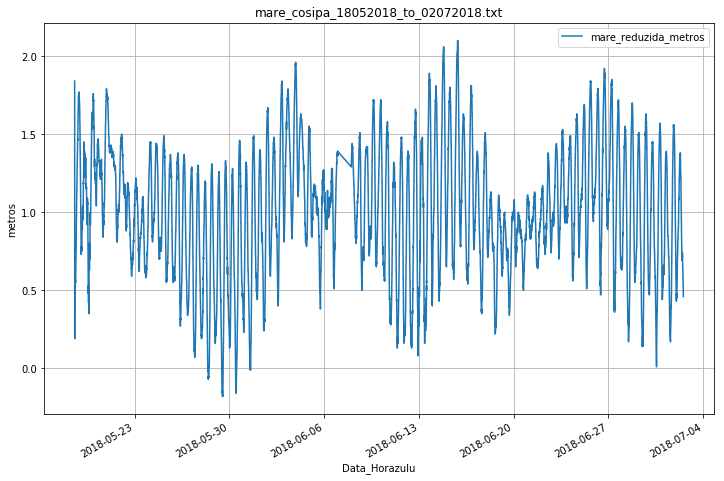

/home/hp/Dropbox/maresantos/data/mare_praticagem_03052018_to_02072018.txt
                     mare_reduzida_metros
Data_Horazulu                            
2018-05-03 13:00:56                  0.20
2018-05-03 13:01:55                  0.17
2018-05-03 13:02:55                  0.19
2018-05-03 13:03:55                  0.19
2018-05-03 13:04:55                  0.18


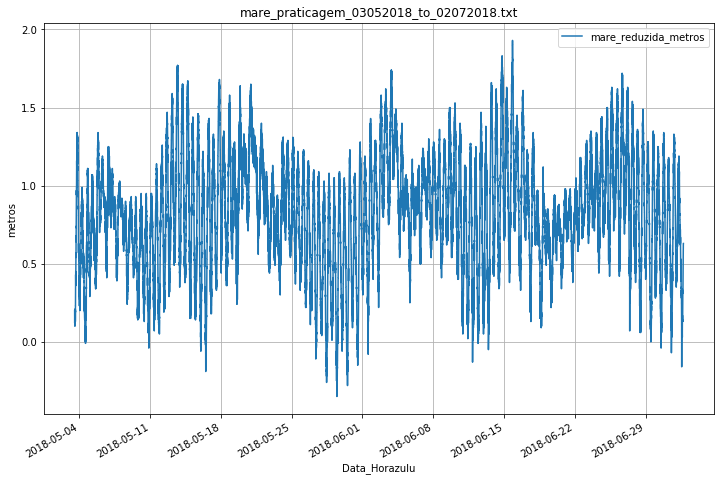

/home/hp/Dropbox/maresantos/data/mare_btp_03052018_to_04062018.txt
                     mare_reduzida_metros
Data_Horazulu                            
2018-05-03 13:17:53                  2.26
2018-05-03 13:18:53                  2.26
2018-05-03 13:19:53                  2.25
2018-05-03 13:20:53                  2.25
2018-05-03 13:21:53                  2.24


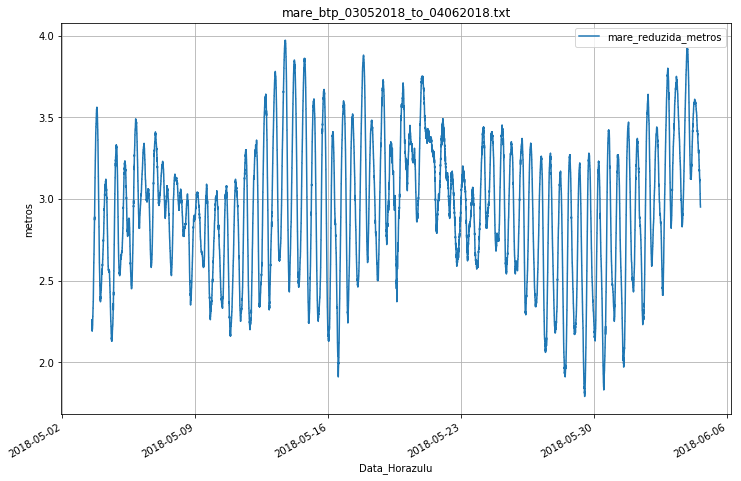

In [115]:
paths = glob.glob(os.environ['HOME'] + '/Dropbox/maresantos/data/*.txt')
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y %H:%M:%S')

for path in paths:
    print (path)
    df = pd.read_table(path,
                       sep=';',
                       parse_dates=[['Data', 'Horazulu']],
                       index_col=[0],
                       date_parser=dateparse,
                      )
    print(df[:5])
    ax = df.plot(title=path.split('/')[-1],figsize=(12,8), grid='on')
    ax.set_ylabel("metros")
    plt.show()